# APS Lab 2: Finding Position with Linear Least Squares

### EECS16A: Designing Information Devices and Systems I, Fall 2020

<!------ Developed by Phil Sandborn, Seiya Ono, Linda Du ------>

# Table of Contents

* [Instructions](#instructions)
* [Lab Policies](#policies)
* [Introduction](#intro)
* [Task 0: Imports](#task0)
* [Multilateration](#multilateration)
* [Task 1: Constructing the System of Equations](#task1)
* [Task 2: Using Least Squares](#task2)
* [Task 3: Simulation Testing](#task3)
* [Task 4: Real Life Positioning](#task4)

<a id='instructions'></a>
## Instructions
* Complete this lab by filling in all of the required sections, marked with `"YOUR CODE HERE"` or `"YOUR COMMENTS HERE"`.
* When you finish, submit a checkoff request to get checked off for this lab. Be ready to answer a few questions to show your understanding of each section.
* Labs will be graded based on completion for teams of 2-4 students.

<a id='policies'></a>
## Lab Policies
* **YOU MUST ATTEND THE LAB SECTION YOU ARE ENROLLED IN. If you anticipate missing a section, please notify your GSI in advance.**
* **You are free to stay for the full allotted time and hack around with the lab setup or code, but please reserve the GSI's time for lab-related questions.**
* **Keep food and drinks away from your devices / equipment.**

<a id='intro'></a>
## Introduction

**<span style="color:red">
If you have not completed APS 1 yet, you must complete it first, or this lab will not make any sense. You can then complete APS 2 during the next and final buffer lab.
</span>**

In the last lab we introduced the signal processing part for our lab and obtained the TDOA's (Time Difference Of Arrivals) of different beacon signals. This week we are going to explore methods that help us determine the final position.

<a id='task0'></a>
# <span style="color:blue">Task 0: Imports</span>

In [1]:
%pylab inline
%run -i support_code/APS.py
%run support_code/helper_functions.py

Populating the interactive namespace from numpy and matplotlib


<a id='multilateration'></a>
# Multilateration

Multilateration is a technique sometimes used in positioning systems to precisely locate a receiver by measuring the time difference of arrivals (TDOAs) from several synchronized *Beacons* at one receiver location.

Suppose we have $n$ beacons $B_0$, $B_1$, ... $B_{n - 1}$, so the position of a beacon $B_m$ in the 2-D plane will be $B_m = (x_m, y_m)$. These positions are known. We also have a receiver $R$ with unknown position $(x, y)$ in the same plane. Let $R_m$ denote the distance of $B_m$ to $R$, $R_m = \sqrt{(x - x_m)^2 + (y - y_m)^2}$. 

For simplification, in this lab we set the first beacon $B_0$ at position (0, 0), as a reference. We also let $\tau_0$, $\tau_1$ ... $\tau_{n - 1}$ denote the TDOA's. Since we are referencing the first beacon, $\tau_0$ is zero.

Recall from last week that we find the distances from speakers to the microphone with the arrival time of the first beacon $t_0$. However in a real application like GPS finding $t_0$ is impossible. Thus we are unable to get the exact distances from the speakers to the microphone. Instead of obtaining circles as we got last week, we are only able to get hyperbolic solutions, which is explained below. 

**<span style="color:red">
This is a math-heavy section and requires a careful and thorough reading. Do this before writing any code. If anything is unclear, ask a TA for help before proceeding.
</span>**


**Setting up n-1 hyperbolic equations:** Luckily we can still find the relationship of position $R = (x, y)$ and $B_m = (x_m, y_m)$ with some calculations. Let $v_s$ be the speed of sound and $R_0$ be the distance between $R$ and Beacon $B_0$, which we have positioned at the origin. We can setup our initial equation using the fact distance is the speed of sound multiplied by the time of travel:

$$R_m - R_0 = v_s \tau_m$$
$$\text{multiply this by } R_m + R_0$$

---

$$(R_m - R_0)(R_m + R_0) = v_s \tau_m (R_m + R_0)$$
$$\text{Distribute left side}$$

---

$$R_m^2-R_0^2 = v_s \tau_m (R_m + R_0)$$ 
$$\text{Divide by }v_s \tau_m$$

---

$$\frac{R_m^2-R_0^2}{v_s\tau_m}=R_m+R_0$$
$$\text{Rewrite } R_m+R_0 \text{ as } R_m-R_0+2R_0$$

---

$$\frac{R_m^2-R_0^2}{v_s\tau_m} = R_m - R_0 + 2R_0$$
$$\text{Group right hand side}$$

---

$$\frac{R_m^2-R_0^2}{v_s\tau_m} = (R_m-R_0)+2R_0$$
$$\text{Using } R_m-R_0=v_s\tau_m \text{ from above, substitute}$$

---
$$v_s\tau_m + 2R_0 = \frac{R_m^2-R_0^2}{v_s\tau_m}$$
$$\text{Move } 2R_0 \text{ to the other side}$$

---

$$v_s\tau_m = \frac{R_m^2-R_0^2}{v_s\tau_m} - 2R_0$$
$$\text{ sub in $R_m = \sqrt{(x - x_m)^2 + (y - y_m)^2}$ from above for all  $R_m$}$$
$$\text{Recognize that } R_0 = \sqrt{x^2+y^2} \text{ because } $$
$$x_0 = 0 \text{ and } y_0 = 0 \text{ since it is at the origin}$$

---

$$v_s\tau_m = \frac{\sqrt{(x - x_m)^2 + (y - y_m)^2}^2 - \sqrt{x^2 + y^2}^2}{v_s\tau_m} - 2\sqrt{x^2 + y^2}$$
$$\text{Simplify Square Roots}$$

---

$$v_s\tau_m=\frac{(x-x_m)^2+(y-y_m)^2 - x^2 - y^2}{v_s\tau_m} - 2\sqrt{x^2+y^2}$$
$$\text{Distribute Squares}$$

---

$$v_s\tau_m = \frac{(x^2-2x x_m + x_m^2) + (y^2 - 2y y_m + y_m^2) - x^2 - y^2}{v_s\tau_m} - 2\sqrt{x^2+y^2}$$
$$\text{Cancel out } x^2 \text{ and } y^2 \text{ in numerator}$$

---

$$v_s\tau_m = \frac{-2x x_m + x_m^2 - 2y y_m + y_m^2}{v_s\tau_m} - 2\sqrt{x^2+y^2}$$

The code below shows an example of how the hyperbolic equation above is applied to three of four received beacon signals (recall that $B_0$ is our reference). Their intersection marks the position of the microphone.

Suppose we have four speakers located at (0, 0), (5, 0), (0, 5), (5, 5), respectively. We will simulate the case where the microphone is positioned at (1.2, 3.6). Run the following block.

The distances are: [3.79473319 5.23768625 1.84250258 4.04937197]


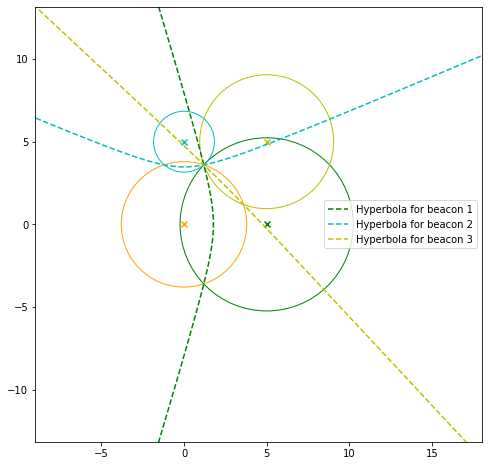

In [2]:
hyperbola_demo_1()

Solving for the intersection point of these hyperbolic equations in the plot above is computationally simple. However, real recorded signals will have error which will make an exact solution for all the beacons impossible. Least squares can be used to solve for the solution with the minimum amount of error, however this becomes mathematically difficult for non-linear equations such as our hyperbolas. Fortunately, we can linearize our system of equations to make least squares computationally simple and reliable.

**Getting $n-2$ linear equations:** Our hyperbolic solution in the previous section involves a square root we wish to get rid of. Observing that our non-linear term $\sqrt{x^2 + y^2}$ is independent of $x_m$ or $y_m$, we can sacrifice a beacon, $B_1$, to linearize our system:

$$ v_s\tau_m - v_s\tau_1 = \Bigg[\frac{-2x_mx + {x_m}^2 -2y_my + {y_m}^2}{v_s\tau_m} - 2\sqrt{x^2 + y^2}\Bigg] - \Bigg[\frac{-2x_1x + {x_1}^2 -2y_1y + {y_1}^2}{v_s\tau_1} - 2\sqrt{x^2 + y^2}\Bigg]$$

The subtraction removes the non-linear term. The final equation with respect to $B_m$ is ($m$ ranges from 2 to $n-1$): 

$$ \Bigg(\frac{2 x_m}{v_s\tau_m}-\frac{2 x_1}{v_s\tau_1}\Bigg)x + \Bigg(\frac{2 y_m}{v_s\tau_m}-\frac{2 y_1}{v_s\tau_1}\Bigg)y = \Bigg(\frac{{x_m}^2 + {y_m}^2}{v_s\tau_m} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}\Bigg) - \Bigg(v_s\tau_m - v_s\tau_1\Bigg)$$


Below is the same equation written out as a matrix for a system that has $M$ speakers. $x$ and $y$ are the coordinates of your speaker that you would like to solve for.

$$ \large
\begin{bmatrix}
    \frac{2 x_2}{v_s\tau_2}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_2}{v_s\tau_2}-\frac{2 y_1}{v_s\tau_1} \\
    \frac{2 x_3}{v_s\tau_3}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_3}{v_s\tau_3}-\frac{2 y_1}{v_s\tau_1} \\
    \vdots & 
        \vdots  \\
    \frac{2 x_m}{v_s\tau_m}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_m}{v_s\tau_m}-\frac{2 y_1}{v_s\tau_1} \\
    \vdots &
        \vdots \\
    \frac{2 x_M}{v_s\tau_M}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_M}{v_s\tau_M}-\frac{2 y_1}{v_s\tau_1} \\
\end{bmatrix}
\begin{bmatrix} 
    x \\  
    y 
\end{bmatrix} 
=
\begin{bmatrix} 
    (\frac{{x_2}^2 + {y_2}^2}{v_s\tau_2} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_2 - v_s\tau_1) \\
    (\frac{{x_3}^2 + {y_3}^2}{v_s\tau_3} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_3 - v_s\tau_1) \\
    \vdots \\
    (\frac{{x_m}^2 + {y_m}^2}{v_s\tau_m} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_m - v_s\tau_1) \\
    \vdots \\
    (\frac{{x_M}^2 + {y_M}^2}{v_s\tau_M} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_M - v_s\tau_1) 
\end{bmatrix}
$$

The result is a linear equation with our position as linear variables.

**<span style="color:red">
What is the minimum number of beacons we need in order to be able to recover a position from our system?
</span>**

**`3`**

Run the code below to plot the speakers of our system.

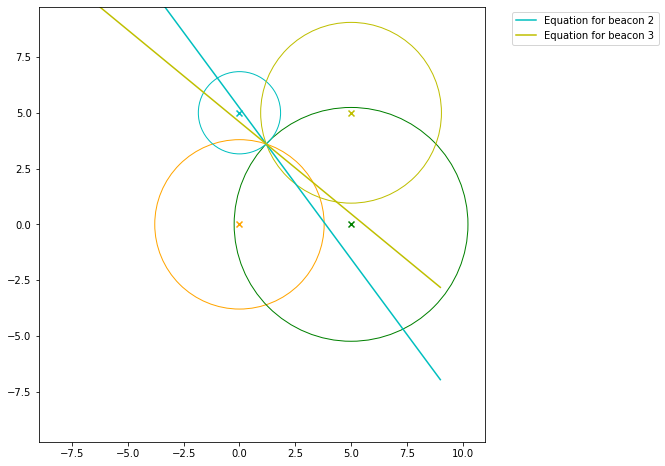

In [3]:
plot_speakers_demo()

As we see in the above example, the microphone's position lies on the intersection of the curves. Finding the position of the microphone is equivalent to finding the solution for the linear system.

**<span style="color:red">
Is our actual positioning system setup in this lab overdetermined or underdetermined? You may want to look at the presentation for APS 2 on the course website for a picture of the setup. Is this good or bad?
</span>**

**`Overdetermined`**

**<span style="color:red">
Compare those two approaches (linear vs. hyperbolic equations). Which approach would be easier to implement?
</span>**

**`linear`**

Reference (and more reading!): http://en.wikipedia.org/wiki/Multilateration

<a id='task1'></a>
# <span style="color:blue">Task 1: Constructing the System of Equations</span>

Once we find the equations for each speaker and the microphone, we are able to construct a system of linear equations.

**<span style="color:red"> Write the function below that sets up the least squares problem. While the code block is large and may seem complex, the subfunctions that you have to fill in are much simpler. If you find yourself stuck, try fulfilling the exact requirements of the function you are working on, while ignoring the others.</span>**

For your convenience, the matrix equation is copied here:

$$ \large
\begin{bmatrix}
    \frac{2 x_2}{v_s\tau_2}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_2}{v_s\tau_2}-\frac{2 y_1}{v_s\tau_1} \\
    \frac{2 x_3}{v_s\tau_3}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_3}{v_s\tau_3}-\frac{2 y_1}{v_s\tau_1} \\
    \vdots & 
        \vdots  \\
    \frac{2 x_m}{v_s\tau_m}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_m}{v_s\tau_m}-\frac{2 y_1}{v_s\tau_1} \\
    \vdots &
        \vdots \\
    \frac{2 x_M}{v_s\tau_M}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_M}{v_s\tau_M}-\frac{2 y_1}{v_s\tau_1} \\
\end{bmatrix}
\begin{bmatrix} 
    x \\  
    y 
\end{bmatrix} 
=
\begin{bmatrix} 
    (\frac{{x_2}^2 + {y_2}^2}{v_s\tau_2} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_2 - v_s\tau_1) \\
    (\frac{{x_3}^2 + {y_3}^2}{v_s\tau_3} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_3 - v_s\tau_1) \\
    \vdots \\
    (\frac{{x_m}^2 + {y_m}^2}{v_s\tau_m} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_m - v_s\tau_1) \\
    \vdots \\
    (\frac{{x_M}^2 + {y_M}^2}{v_s\tau_M} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_M - v_s\tau_1) 
\end{bmatrix}
$$

In [4]:
def construct_system(speakers, TDOA, v_s, isac=1, plot=0):
    """Construct the components of the system according to a list of TDOAs and speaker coordinates
    Args:
    speakers (np.array): an array of speaker coordinates
    TDOA (np.array): an array of TDOA's
    isac : index of speaker to be sacrificed for linearization
    
    Returns:
    A (np.array): the matrix corresponding to the least squares system
    b (np.array): the vector corresponding to the least squares system
    
    YOUR TASK:
    1. Read over the doc strings to understand how the helper functions are to be implemented
    2. Using the matrix system above as a reference, complete helpers x, y, and b
    3. Take note of x_sac, y_sac, and t_sac below; think about how they can be used in the helper functions
    4. Using your helper functions, complete "BUILDING THE SYSTEM" to make A and b
    """
    x_sac, y_sac = speakers[isac]
    t_sac = TDOA[isac]
    
    def helperx(i):
        """Calculates the value for a row in the left column of the A matrix
        Arg:
        i : index of speaker to be used for the calculation
        
        Useful Variables: 
        speakers[i] : returns x_i, y_i (see x_sac and y_sac above for an example)
        TDOA[i] : returns t_i 
        
        Returns:
        A[i][0]'s calculated out value
        """
        # YOUR CODE HERE
        x, y = speakers[i]
        t = TDOA[i]
        return ((2 * x) / (v_s * t)) - ((2 * x_sac) / (v_s * t_sac))
        
    
    def helpery(i):
        """Calculates the value for a row in the right column of the A matrix
        Arg:
        i : index of speaker to be used for the calculation
        
        Useful Variables: 
        speakers[i] : returns x_i, y_i (see x_sac and y_sac above for an example)
        TDOA[i] : returns t_i 
        
        Returns:
        A[i][1]'s calculated out value
        """
        # YOUR CODE HERE
        x, y = speakers[i]
        t = TDOA[i]
        return ((2 * y) / (v_s * t)) - ((2 * y_sac) / (v_s * t_sac))
        
    def helperb(i):
        """Calculates the ith value of the b vector
        Arg:
        i : index of speaker to be used for calculation
        
        Useful Variables: 
        speakers[i] : returns x_i, y_i (see x_sac and y_sac above for an example)
        TDOA[i] : returns t_i 
        
        Returns:
        b[i]'s calculated out value
        """
        # YOUR CODE HERE
        x, y = speakers[i]
        t = TDOA[i]
        x_sq, y_sq = x * x, y * y
        x_sac_sq, y_sac_sq = x_sac * x_sac, y_sac * y_sac
        return (((x_sq + y_sq) / (v_s * t)) - ((x_sac_sq + y_sac_sq) / (v_s * t_sac))) - ((v_s * t) - (v_s * t_sac))
    
    # BUILDING THE SYSTEM
    
    #A is a nested list. Each element of A is a list 
    #that represents one row of the matrix corresponding to the least squares system
    A = []
    #B is simply a list. Each element of B is one element of the vector corresponding to the least squares system
    b = []
    # A and b are converted to numpy arrays in the return statement at the end of the block. You don't have to worry about that.
    
    for i in range(1, len(TDOA)):
        if (i!=isac): #if i is not the index of the beacon to be sacrificed, **add** elements to A and b
            # YOUR CODE HERE
            A.append([helperx(i), helpery(i)])
            b.append([helperb(i)])
            
            
            
    # PLOTTING
    if plot==1: #plot the linear equations
        x = np.linspace(-9, 9, 1000)
        for i in range(len(b)):
            y = [(b[i] - A[i][0]*xi) / A[i][1] for xi in x]
            plt.plot(x, y, label="Equation" + str(i + 1))   
        plt.xlim(-9, 9)
        plt.ylim(-6, 6)
        plt.legend()
        plt.show()
        
    # NORMALIZATIONS
    AA, bb = [], []
    for i in range(len(A)):
        AA.append([A[i][0]/np.linalg.norm(A[i]), A[i][1]/np.linalg.norm(A[i])])
        bb.append(b[i]/np.linalg.norm(A[i]))  
        
    return np.array(AA), np.array(bb)

Take a look at your results and make sure it works correctly (Don't worry if there are some small errors on order of +/- 0.5):

In [5]:
construct_system_test(construct_system)

Row 0: -3 should equal -3
Row 1: 4 should equal 4
Row 2: -2 should equal -2
Row 3: 1 should equal 1


$$ \large
\begin{bmatrix}
    \frac{2 x_2}{v_s\tau_2}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_2}{v_s\tau_2}-\frac{2 y_1}{v_s\tau_1} \\
    \frac{2 x_3}{v_s\tau_3}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_3}{v_s\tau_3}-\frac{2 y_1}{v_s\tau_1} \\
    \vdots & 
        \vdots  \\
    \frac{2 x_m}{v_s\tau_m}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_m}{v_s\tau_m}-\frac{2 y_1}{v_s\tau_1} \\
    \vdots &
        \vdots \\
    \frac{2 x_M}{v_s\tau_M}-\frac{2 x_1}{v_s\tau_1} & 
        \frac{2 y_M}{v_s\tau_M}-\frac{2 y_1}{v_s\tau_1} \\
\end{bmatrix}
\begin{bmatrix} 
    x \\  
    y 
\end{bmatrix} 
=
\begin{bmatrix} 
    (\frac{{x_2}^2 + {y_2}^2}{v_s\tau_2} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_2 - v_s\tau_1) \\
    (\frac{{x_3}^2 + {y_3}^2}{v_s\tau_3} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_3 - v_s\tau_1) \\
    \vdots \\
    (\frac{{x_m}^2 + {y_m}^2}{v_s\tau_m} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_m - v_s\tau_1) \\
    \vdots \\
    (\frac{{x_M}^2 + {y_M}^2}{v_s\tau_M} - \frac{{x_1}^2 + {y_1}^2}{v_s\tau_1}) - (v_s\tau_M - v_s\tau_1) 
\end{bmatrix}
$$

Looking at the matrix form of our system, comment on the following:

**<span style="color:red">
Why does the first row of the matrix start at $m=2$? Why does it not make sense to start at $m=0$ or $1$?
</span>**

**`Because we need at least 3 beacons, so we need to start at 2`**

**<span style="color:red">
What is the minimum number of rows that the matrix requires for this system to be solvable? Understanding how Linear Least Squares works, do we want more or exactly that many rows to get an accurate reading of our position?
</span>**

**`3, Generally, more should be better, as we want to reduce noise, and get better predicitons`**

<a id='task2'></a>
# <span style="color:blue">Task 2: Using Least Squares</span>

**Definition**: If $A$ is an $m \times n$ matrix and $\vec{b}$ is in $\mathbb{R}^m$, a **least squares solution** of $A\vec{x}=\vec{b}$ is an $\hat{\vec{x}}$ in $\mathbb{R}^n$ such that for all $\vec{x}$ in $\mathbb{R}^n$: $||\vec{b} - A\hat{\vec{x}}|| \leq ||\vec{b} - A\vec{x}||$.

The solution for an overdetermined problem is given by solving the normal equations: $A^TA\vec{x}=A^T\vec{b}$.

For more on least squares, here's a link to [Note 23](https://eecs16a.org/lecture/Note23.pdf).

**Why do we need least squares here?**

During the transmission of sound in air, some noise is added into the signal. Most of the time we don't receive the original signal perfectly; in other words, the linear system is no longer consistent due to the modified signal. Also in our positioning system, we have more than 2 linear equations to improve the accuracy. However with more equations, the linear system is more likely to be inconsistent. Least squares solution ensures a best approximation we can get, even if there is technically no solution to the system.

**<span style="color:red">Implement the following function given arguments matrix A and vector b. Implement your own function for solving least squares, do not use the least squares solver built into python. Make sure your code passes the test before moving on.</span>**

In [6]:
def least_squares(A, b):
    """Solve the least squares problem
    
    Args:
    A (np.array): the matrix in the least squares problem
    b (np.array): the vector in the least squares problem
    
    Returns:
    pos (np.array): the result of the least squares problem (x)    
    """

    # Hint: Might be useful searching for dot product, transpose, and inverse of numpy arrays
    
    # YOUR CODE HERE
    ATA = A.T.dot(A);
    ATA_inv = np.linalg.inv(ATA);
    ATA_inv_AT = ATA_inv.dot(A.T);
    x = ATA_inv_AT.dot(b);
    return x

**<span style="color:red">Test your code with noisy inputs by running the following block. Are all of the estimates in the cases with noise reasonable? Why or why not?</span>**
(This will take a while to compute. Don't worry if there are some small errors on the order of +/- 0.1)

In [7]:
# Testing signals with noise
test_loc(least_squares, construct_system, 1.2, 3.6, 30)
test_loc(least_squares, construct_system, 1.2, 3.6, 40)
test_loc(least_squares, construct_system, 1.2, 3.6, 50)

Expected: (1.200, 3.600); got (1.192, 3.608)

Expected: (1.200, 3.600); got (1.201, 3.597)

Expected: (1.200, 3.600); got (1.215, 3.585)



<a id='task3'></a>
# <span style="color:blue">Task 3: Simulation Testing</span>

**<span style="color:red">You will go through a simulation to ensure that your code is working for a stable, slightly noisy simulation. Run the code below to test your code against our test signal. Your calculated position should be decently close to where we have placed the microphone. </span>**

Least Squares Microphone Position: 0.0037, 0.3948
Actual Microphone Position: 0.0000, 0.4000
Calcuated Distances from Beacons : [0.3948, 0.6571, 0.6649, 0.5723, 0.1710, 0.1093]



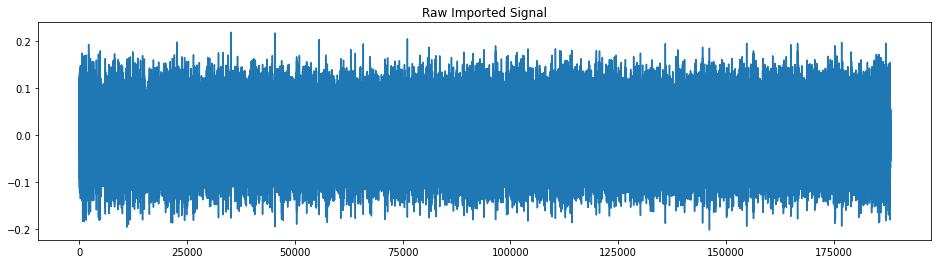

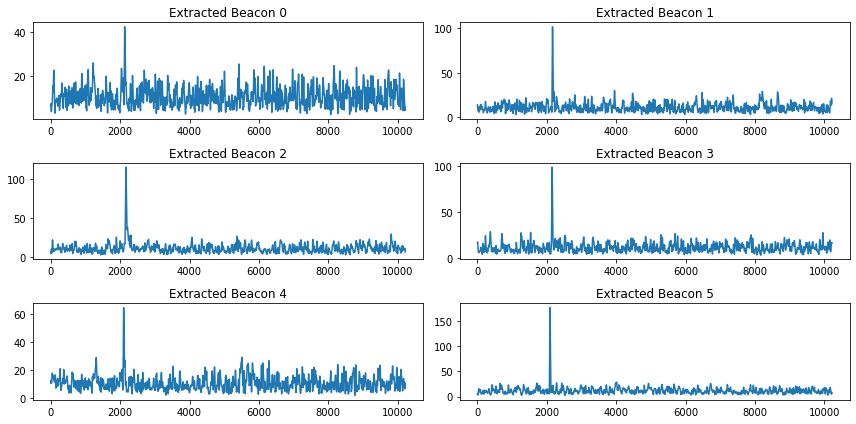

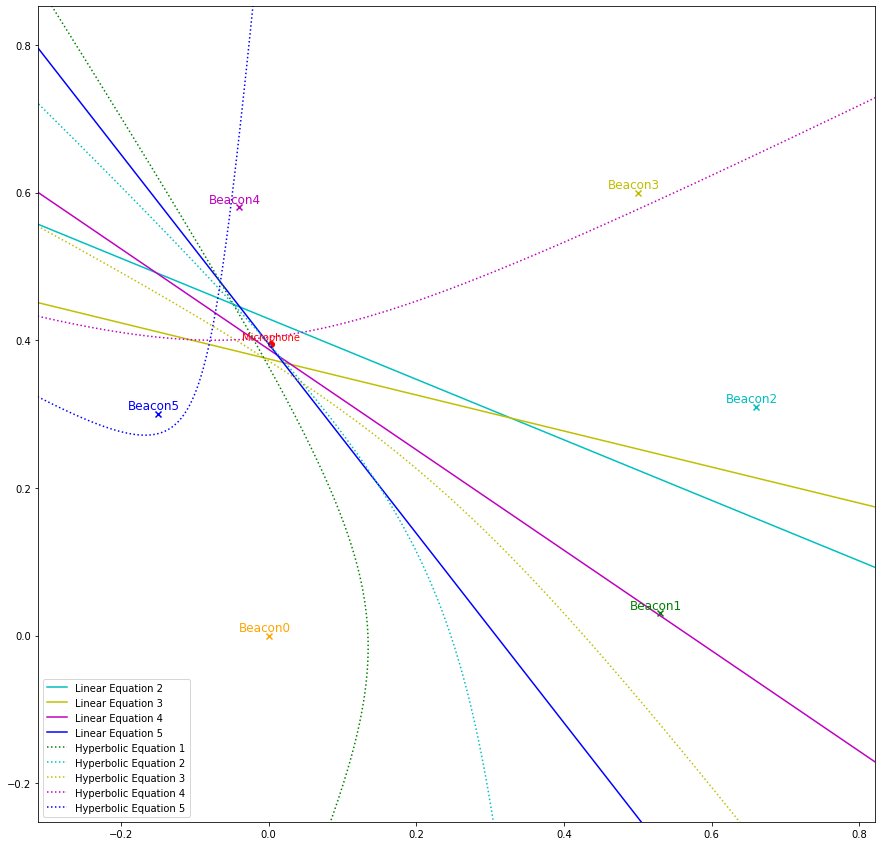

In [8]:
Lab = APS('new_data.npy', [0, 40], ms= True)
Lab.simulation_testing('APS_Recording/test-signal.wav', construct_system, least_squares)

<a id='task4'></a>
# <span style="color:blue">Task 4: "Real Life" Positioning </span>

In [9]:
%run -i support_code/APS.py
Lab = APS('new_data.npy')

<Figure size 432x288 with 0 Axes>

We are now ready to determine the position of a microphone in a virtual lab! Run the cell below and then click on a point on the virtual table to "place" the microphone there. In case the next cell does not respond to your click, you might have to run it again to make it interactive (thanks to a quirk in one of the Python libraries we use). Then, run the following cells to see if your code can determine where you place your microphone. 

<IPython.core.display.Javascript object>


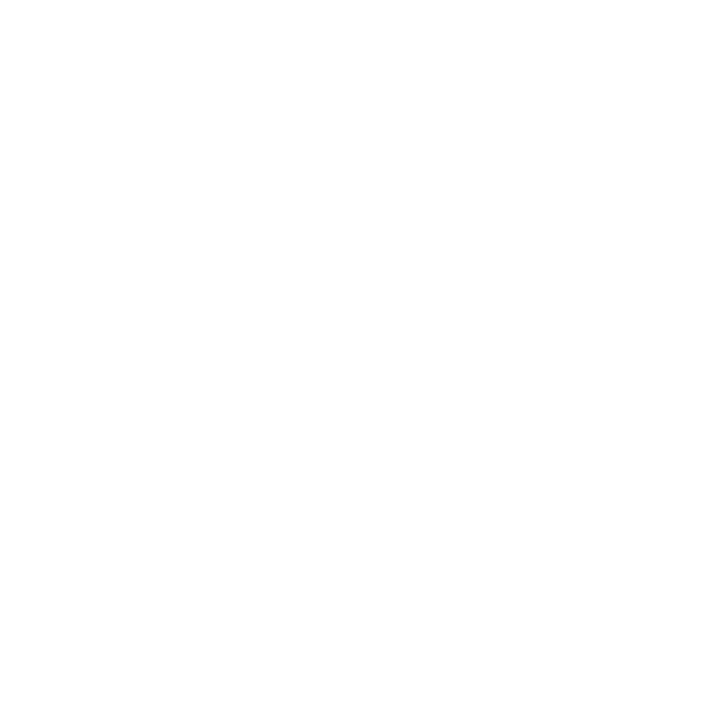

<IPython.core.display.Javascript object>


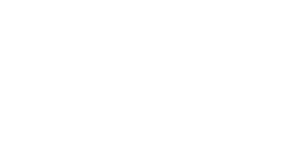

In [10]:
%matplotlib notebook
LOC = Lab.generate_microphone_loc()

In [11]:
print('Microphone Location: ', LOC)

Microphone Location:  [25. 30.]


Least Squares Microphone Position: 24.2524, 30.0118
Actual Microphone Position: 25.0000, 30.0000
Calcuated Distances from Beacons : [38.5861, 39.3578, 40.9010, 39.3578, 40.1294, 39.3578]



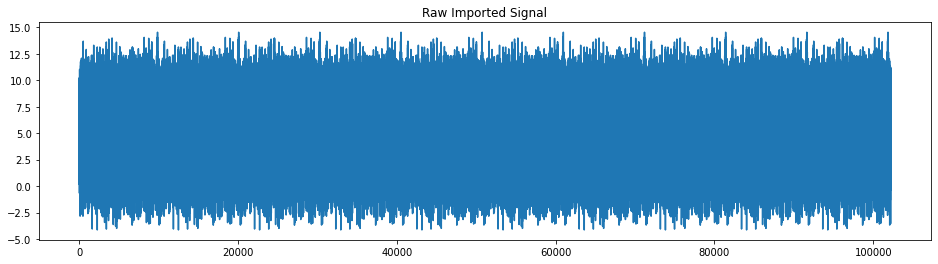

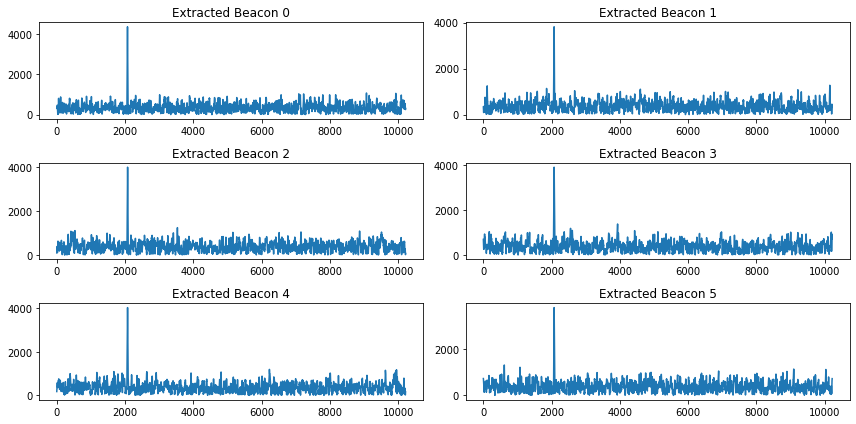

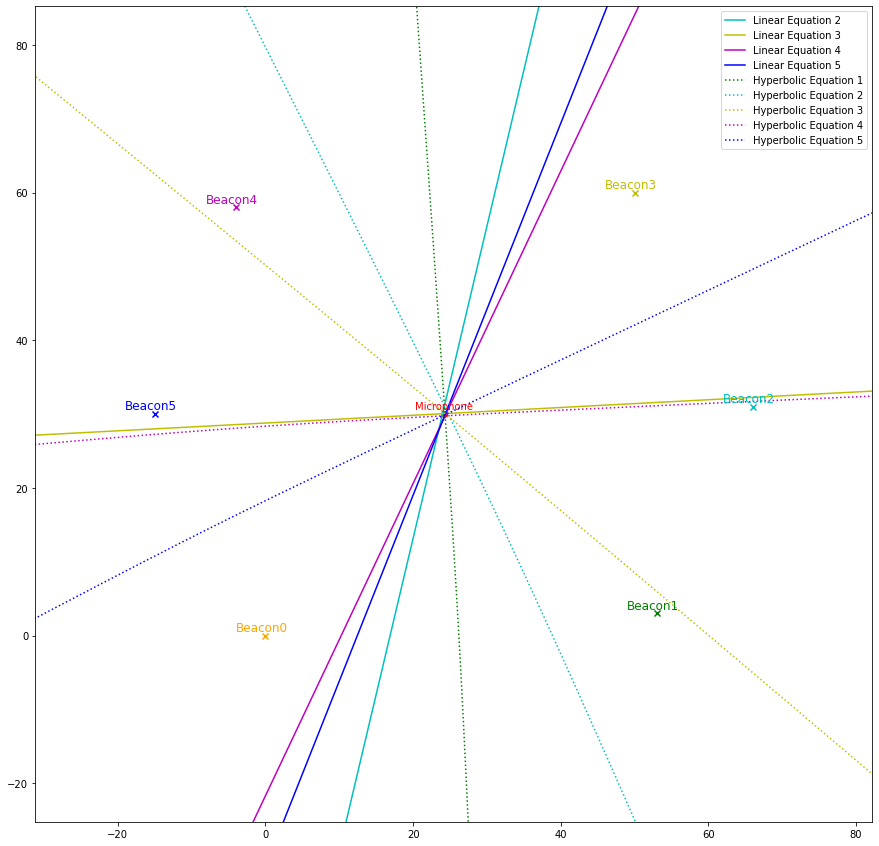

In [12]:
%matplotlib inline
Lab.generate_raw_signal(LOC, noise = True)
Lab.save_to_wav_file("APS_Class_Sim.wav")
Lab.simulation_testing("APS_Class_Sim.wav", construct_system, least_squares, isac=1)

## **Congratulations!**
You have successfully located a microphone using techniques such as cross-correlation, multilateration and least squares.

<a id='checkoff'></a>
## Checkoff
When you are ready to get checked off,
1. Fill out the checkoff google form. **[Checkoff Form](https://forms.gle/3RemPsckTCDggJmk6)**
2. Submit a **checkoff** request on the lab queue. **[Checkoff queue](https://lab.eecs16a.org)** It is fine if only one person from your group submits the lab queue request, but everyone must submit their own google form. 

Your GSI or a Lab Assistant will join your breakout room when they are available and go through some checkoff questions with your group. They will go through the checkoff list in order. Please be patient!

## **<span style="color:red"> Please have your notebook ready to demo before being checked off. </span>**